In [120]:
import numpy as np
from matplotlib import pylab as plt
import scipy as sp
from os import listdir,path
from os.path import isfile,join,isdir
from scipy.optimize import curve_fit
from scipy.stats import norm
import math
from scipy import asarray as ar,exp
import pandas as pd

def gaus(x,a,x0,sigma):
  return (a/sigma)*exp(-(x-x0)**2/(2*sigma**2))

def midpoints(hvals):
    hvals_shift=np.append(hvals[1:],0)
#     print(hvals)
#     print(hvals[1:])
#     print(np.append(hvals[1:],0))
    midp=(hvals+hvals_shift)/2.0
    return midp[:-1]

In [2]:
dirpath="../data/Fe-55_0RadDam_20deg/"

files=[f for f in listdir(dirpath) if isfile(join(dirpath, f))]
files=sorted(files)
n_files=len(files)
#im=np.fromfile
print (n_files)

100


In [13]:
chosenPix=np.array([])
chosenPixels=np.array([])
ChosenPixX=1350
ChosenPixY=2250

startx=1351
endx=1450
starty=2299
endy=2400
# starty=2070
# endy=2171
# startx=1350
# endx=1400
# starty=2250
# endy=2300

imarray=np.zeros([2800,2400],dtype='float')
imarraySq=np.zeros([2800,2400],dtype='float')
for j,file_iter in enumerate(files):
    print(j,file_iter)

    if ".tiff" not in file_iter: 
        continue
    else:
        im=plt.imread(str(dirpath+"/"+file_iter)) #np.fromfile(file_iter,dtype='uint16',sep="")
        im=im.astype('float')
        imarray=imarray+(im/n_files)
        imarraySq=imarraySq+(np.square(im)/n_files)
        chosenPix=np.append(chosenPix,im[ChosenPixY,ChosenPixX])
        chosenPixels=np.append(chosenPixels,im[starty:endy,startx:endx])


0 File_0000.tiff
1 File_0001.tiff
2 File_0002.tiff
3 File_0003.tiff
4 File_0004.tiff
5 File_0005.tiff
6 File_0006.tiff
7 File_0007.tiff
8 File_0008.tiff
9 File_0009.tiff
10 File_0010.tiff
11 File_0011.tiff
12 File_0012.tiff
13 File_0013.tiff
14 File_0014.tiff
15 File_0015.tiff
16 File_0016.tiff
17 File_0017.tiff
18 File_0018.tiff
19 File_0019.tiff
20 File_0020.tiff
21 File_0021.tiff
22 File_0022.tiff
23 File_0023.tiff
24 File_0024.tiff
25 File_0025.tiff
26 File_0026.tiff
27 File_0027.tiff
28 File_0028.tiff
29 File_0029.tiff
30 File_0030.tiff
31 File_0031.tiff
32 File_0032.tiff
33 File_0033.tiff
34 File_0034.tiff
35 File_0035.tiff
36 File_0036.tiff
37 File_0037.tiff
38 File_0038.tiff
39 File_0039.tiff
40 File_0040.tiff
41 File_0041.tiff
42 File_0042.tiff
43 File_0043.tiff
44 File_0044.tiff
45 File_0045.tiff
46 File_0046.tiff
47 File_0047.tiff
48 File_0048.tiff
49 File_0049.tiff
50 File_0050.tiff
51 File_0051.tiff
52 File_0052.tiff
53 File_0053.tiff
54 File_0054.tiff
55 File_0055.tiff
56

In [14]:
chosenPixels.shape

(999900,)

(100, 101, 99)


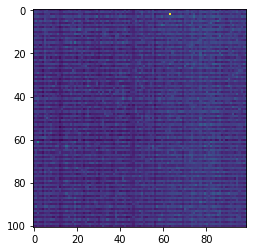

In [17]:
chosenPixels3d=chosenPixels.reshape((n_files,(endy-starty),(endx-startx)))
print(chosenPixels3d.shape)
plt.imshow(chosenPixels3d[0,:,:])

In [121]:
bad_fits_counter=0
means=np.array([])
stds=np.array([])
heights=np.array([])
x_vals=np.array([])
y_vals=np.array([])

for pix_y in range(0,(endy-starty)): #(endy-starty)*(endx-startx)
    for pix_x in range(0,(endx-startx)): #(endy-starty)*(endx-startx)
        if (pix_x%10==0 and pix_y%10==0):
            print(pix_x,pix_y)
        histValues=plt.hist(chosenPixels3d[:,pix_y,pix_x],bins=45)
#         histValues[]
        mphist=midpoints(histValues[1])
        meanh=chosenPixels3d[:,pix_y,pix_x].mean()
        try:
            popt,pcov=curve_fit(gaus,mphist,histValues[0],p0=[15,meanh,15])
        except:
            bad_fits_counter+=1
            continue
        

        x_vals=np.append(x_vals,pix_x)
        y_vals=np.append(y_vals,pix_y)
        heights=np.append(heights,popt[0])
        means=np.append(means,popt[1])
        stds=np.append(stds,popt[2])
#         if((pix_x==47) and (pix_y==32)):
#             plt.plot(histValues[1][:-1],gaus(histValues[1][:-1],*popt),'ro:',label='fit')
#             plt.show()
        plt.cla()
        plt.clf()
#         print(pix_x,pix_y,popt)


print("badfits",bad_fits_counter)


0 0
10 0
20 0
30 0
40 0
50 0
60 0
70 0
80 0
90 0


/usr/local/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


0 10
10 10
20 10
30 10
40 10
50 10
60 10
70 10
80 10
90 10
0 20
10 20
20 20
30 20
40 20
50 20
60 20
70 20
80 20
90 20
0 30
10 30
20 30
30 30
40 30
50 30
60 30
70 30
80 30
90 30
0 40
10 40
20 40
30 40
40 40
50 40
60 40
70 40
80 40
90 40
0 50
10 50
20 50
30 50
40 50
50 50
60 50
70 50
80 50
90 50
0 60
10 60
20 60
30 60
40 60
50 60
60 60
70 60
80 60
90 60
0 70
10 70
20 70
30 70
40 70
50 70
60 70
70 70
80 70
90 70
0 80
10 80
20 80
30 80
40 80
50 80
60 80
70 80
80 80
90 80
0 90
10 90
20 90
30 90
40 90
50 90
60 90
70 90
80 90
90 90
0 100
10 100
20 100
30 100
40 100
50 100
60 100
70 100
80 100
90 100
badfits 0


<Figure size 432x288 with 0 Axes>

In [126]:
df=pd.DataFrame({'x_vals':x_vals, 'y_vals': y_vals, 'heights':heights, 'means':means, 'stds':stds})
df

,x_vals,y_vals,heights,means,stds
0,0.0,0.0,268.948151,3161.938447,14.250323
1,1.0,0.0,222.467884,3128.427050,11.188617
2,2.0,0.0,356.759315,2999.270465,11.324959
3,3.0,0.0,217.056517,3004.622353,9.830166
4,4.0,0.0,199.017706,3058.697892,13.886122
...,...,...,...,...,...
9994,94.0,100.0,230.439896,3100.152748,11.375960
9995,95.0,100.0,311.292044,3047.478942,9.744391
9996,96.0,100.0,203.775997,3020.803417,10.329739
9997,97.0,100.0,143.786106,3029.519594,9.095935


In [144]:
df[(df['y_vals']%2==0)]

,x_vals,y_vals,heights,means,stds
0,0.0,0.0,268.948151,3161.938447,14.250323
1,1.0,0.0,222.467884,3128.427050,11.188617
2,2.0,0.0,356.759315,2999.270465,11.324959
3,3.0,0.0,217.056517,3004.622353,9.830166
4,4.0,0.0,199.017706,3058.697892,13.886122
...,...,...,...,...,...
9994,94.0,100.0,230.439896,3100.152748,11.375960
9995,95.0,100.0,311.292044,3047.478942,9.744391
9996,96.0,100.0,203.775997,3020.803417,10.329739
9997,97.0,100.0,143.786106,3029.519594,9.095935


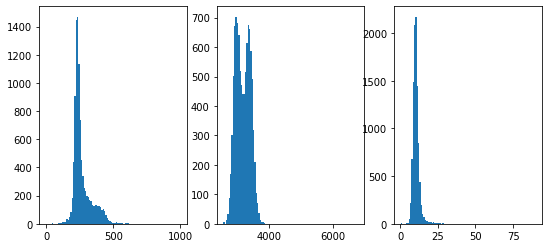

In [128]:
fig,ax=plt.subplots(1,3,figsize=(9,4))
_=ax[0].hist(df['heights'],bins=100,range=(0,1000))
_=ax[1].hist(df['means'],bins=100)
_=ax[2].hist(df['stds'],bins=100)

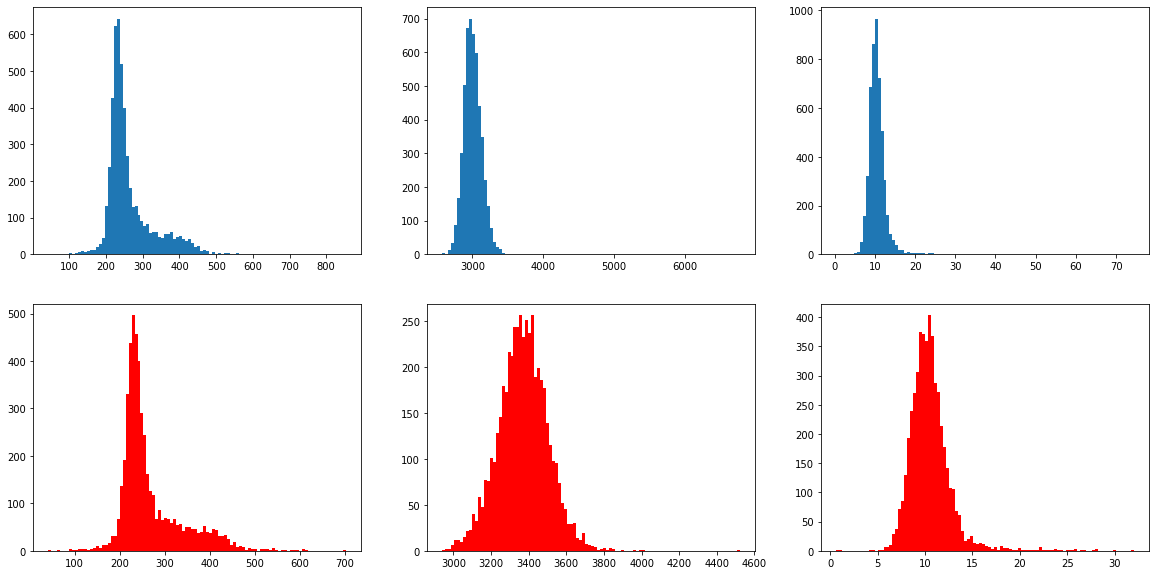

In [129]:
fig,ax=plt.subplots(2,3,figsize=(20,10))
_=ax[0,0].hist(df[(df['y_vals']%2==0)&(df['heights']<1000)]['heights'],bins=100)
_=ax[0,1].hist(df[(df['y_vals']%2==0)&(df['heights']<1000)]['means'],bins=100)
_=ax[0,2].hist(df[(df['y_vals']%2==0)&(df['heights']<1000)]['stds'],bins=100)
_=ax[1,0].hist(df[(df['y_vals']%2==1)&(df['heights']<1000)]['heights'],color='r',bins=100)
_=ax[1,1].hist(df[(df['y_vals']%2==1)&(df['heights']<1000)]['means'],color='r',bins=100)
_=ax[1,2].hist(df[(df['y_vals']%2==1)&(df['heights']<1000)]['stds'],color='r',bins=100)

In [130]:
even_means_mean=df[(df['y_vals']%2==0)&(df['heights']<1000)]['means'].mean()
odd_means_mean=df[(df['y_vals']%2==1)&(df['heights']<1000)]['means'].mean()
even_means_std=df[(df['y_vals']%2==0)&(df['heights']<1000)]['means'].std()
odd_means_std=df[(df['y_vals']%2==1)&(df['heights']<1000)]['means'].std()
even_heights_mean=df[(df['y_vals']%2==0)&(df['heights']<1000)]['heights'].mean()
odd_heights_mean=df[(df['y_vals']%2==1)&(df['heights']<1000)]['heights'].mean()
even_heights_std=df[(df['y_vals']%2==0)&(df['heights']<1000)]['heights'].std()
odd_heights_std=df[(df['y_vals']%2==1)&(df['heights']<1000)]['heights'].std()
even_stds_mean=df[(df['y_vals']%2==0)&(df['heights']<1000)]['stds'].mean()
odd_stds_mean=df[(df['y_vals']%2==1)&(df['heights']<1000)]['stds'].mean()
even_stds_std=df[(df['y_vals']%2==0)&(df['heights']<1000)]['stds'].std()
odd_stds_std=df[(df['y_vals']%2==1)&(df['heights']<1000)]['stds'].std()
print(even_means_mean,odd_means_mean)
print(even_means_std,odd_means_std)
print(even_heights_mean,odd_heights_mean)
print(even_heights_std,odd_heights_std)
print(even_stds_mean,odd_stds_mean)
print(even_stds_std,odd_stds_std)


3001.517222837538 3369.821759556409
134.64784526501276 132.15948460328138
264.0850234951218 267.14399980148073
65.93411063869571 68.01268468205083
10.536182861691204 10.561747455230243
2.7647057238491586 2.2774029343017954


In [149]:
# chosenPixels=chosenPixels.reshape((n_files,(endy-starty)*(endx-startx)))
# chosenPixels.shape
df

,x_vals,y_vals,heights,means,stds
0,0.0,0.0,268.948151,3161.938447,14.250323
1,1.0,0.0,222.467884,3128.427050,11.188617
2,2.0,0.0,356.759315,2999.270465,11.324959
3,3.0,0.0,217.056517,3004.622353,9.830166
4,4.0,0.0,199.017706,3058.697892,13.886122
...,...,...,...,...,...
9994,94.0,100.0,230.439896,3100.152748,11.375960
9995,95.0,100.0,311.292044,3047.478942,9.744391
9996,96.0,100.0,203.775997,3020.803417,10.329739
9997,97.0,100.0,143.786106,3029.519594,9.095935


[3161.93844716 3128.42704975 2999.27046494 ... 3020.80341732 3029.51959381
 3014.02458242]
[ 1.58077339e+01 -9.59029850e-07  1.00000009e+00]


array([False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False])

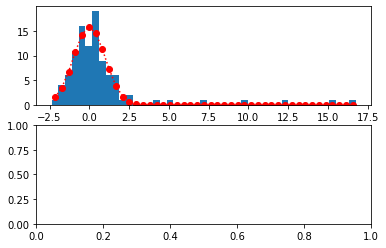

In [174]:
print(means)
means2=means.reshape((endy-starty),(endx-startx))
stds2=stds.reshape((endy-starty),(endx-startx))
fig,ax=plt.subplots(2,1)
chosenPixels3d2=(chosenPixels3d-means2)/stds2
histValues=ax[0].hist(chosenPixels3d2[:,100,97],bins=45)
mphist=midpoints(histValues[1])
popt,pcov=curve_fit(gaus,mphist,histValues[0],p0=[15,0,1])
_=ax[0].plot(mphist,gaus(mphist,*popt),'ro:',label='fit')
print(popt)
# data_mean=popt[1]
# data_std=popt[2]
# reshaped_CP=(chosenPix-data_mean)/data_std

# dtr=ax[1].hist(reshaped_CP,bins=45)
# print(chosenPixels3d[:,0,0])
# print(chosenPixels3d[:,0,0].mean())
# print(chosenPix)
chosenPixels3d2[:,100,97]>4

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


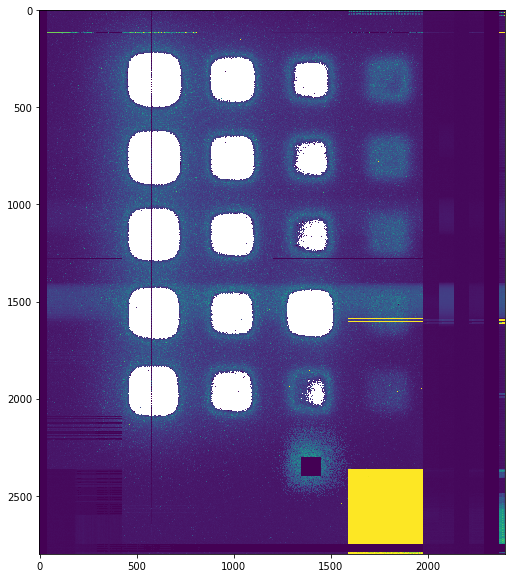

In [26]:
std=np.sqrt(imarraySq-np.square(imarray))

std[starty:endy,startx:endx]=0
plt.figure(figsize=(10,10))
plt.imshow(std,vmin=0,vmax=150)


In [ ]:
plt.plot(chosenPix)

In [ ]:
all_CP_data=np.array([])
fig,ax=plt.subplots(2,1)

histValues=ax[0].hist(chosenPix,bins=45)
histValues[1][:-1].shape
mphist=midpoints(histValues[1])
popt,pcov=curve_fit(gaus,mphist,histValues[0],p0=[15,3300,15])
_=ax[0].plot(mphist,gaus(mphist,*popt),'ro:',label='fit')

data_mean=popt[1]
data_std=popt[2]
reshaped_CP=(chosenPix-data_mean)/data_std

dtr=ax[1].hist(reshaped_CP,bins=45)

In [ ]:
popt

In [ ]:
#remove bad values

all_CP_data=np.array([])
bad_fits_counter=0
outside_range_counter=0


for pix_x in range(0,(endx-startx)): #(endy-starty)*(endx-startx)
    for pix_y in range(0,(endy-starty)): #(endy-starty)*(endx-startx)
        if (pix_x%10==0 and pix_y%10==0):
            print(pix_x,pix_y)
        histValues=plt.hist(chosenPixels3d[:,pix_y,pix_x],bins=45)
        meanh=chosenPixels3d[:,pix_y,pix_x].mean()
        mphist=midpoints(histValues[1])
        try:
            popt,pcov=curve_fit(gaus,mphist,histValues[0],p0=[15,meanh,15])
        except:
            bad_fits_counter+=1
            continue


        plt.cla()
        plt.clf()
        
        if (pix_y%2==0):
            if(popt[1]>even_means_mean+(3*even_means_std) or popt[1]<even_means_mean-(3*even_means_std)):
                outside_range_counter+=1
#                 print(popt,even_means_mean,even_means_std)
                continue
            elif(popt[0]>even_heights_mean+(3*even_heights_std) or popt[0]<even_heights_mean-(3*even_heights_std)):
                outside_range_counter+=1
#                 print('height',popt,even_heights_mean,even_heights_std)
                continue
            elif(popt[2]>even_stds_mean+(3*even_stds_std) or popt[2]<even_stds_mean-(2*even_stds_std)):
                outside_range_counter+=1
#                 print(popt)
                continue
        if (pix_y%2==1):
            if(popt[1]>odd_means_mean+(3*odd_means_std) or popt[1]<odd_means_mean-(3*odd_means_std)):
                outside_range_counter+=1
#                 print(popt)
                continue
            elif(popt[0]>odd_heights_mean+(3*odd_heights_std) or popt[0]<odd_heights_mean-(3*odd_heights_std)):
                continue
                outside_range_counter+=1
#                 print(popt)
            elif(popt[2]>odd_stds_mean+(3*odd_stds_std) or popt[2]<odd_stds_mean-(3*odd_stds_std)):
                outside_range_counter+=1
#                 print(popt)
                continue

        reshaped_CP=(chosenPixels3d[:,pix_y,pix_x]-popt[1])/popt[2]
        all_CP_data=np.append(all_CP_data,reshaped_CP)

print("BF",bad_fits_counter,"OR",outside_range_counter)


In [187]:
#replace bad values
all_CP_data=np.array([])
bad_fits_counter=0
outside_range_counter=0


for pix_x in range(0,(endx-startx)): #(endy-starty)*(endx-startx)
    for pix_y in range(0,(endy-starty)): #(endy-starty)*(endx-startx)
        if (pix_x%10==0 and pix_y%10==0):
            print(pix_x,pix_y)
        histValues=plt.hist(chosenPixels3d[:,pix_y,pix_x],bins=45)
        meanh=chosenPixels3d[:,pix_y,pix_x].mean()
        mphist=midpoints(histValues[1])
        try:
            popt,pcov=curve_fit(gaus,mphist,histValues[0],p0=[15,meanh,15])
        except:
            bad_fits_counter+=1
            continue


        plt.cla()
        plt.clf()
        
        if (pix_y%2==0):
            if(popt[1]>even_means_mean+(3*even_means_std) or popt[1]<even_means_mean-(3*even_means_std)):
                outside_range_counter+=1
#                 print(popt,even_means_mean,even_means_std)
                popt[1]=-999
                popt[2]=-999
            elif(popt[0]>even_heights_mean+(3*even_heights_std) or popt[0]<even_heights_mean-(3*even_heights_std)):
                outside_range_counter+=1
#                 print('height',popt,even_heights_mean,even_heights_std)
                popt[1]=-999
                popt[2]=-999
            elif(popt[2]>even_stds_mean+(3*even_stds_std) or popt[2]<even_stds_mean-(2*even_stds_std)):
                outside_range_counter+=1
#                 print(popt)
                popt[1]=-999
                popt[2]=-999
        if (pix_y%2==1):
            if(popt[1]>odd_means_mean+(3*odd_means_std) or popt[1]<odd_means_mean-(3*odd_means_std)):
                outside_range_counter+=1
#                 print(popt)
                popt[1]=-999
                popt[2]=-999
            elif(popt[0]>odd_heights_mean+(3*odd_heights_std) or popt[0]<odd_heights_mean-(3*odd_heights_std)):
                popt[1]=-999
                popt[2]=-999
                outside_range_counter+=1
#                 print(popt)
            elif(popt[2]>odd_stds_mean+(3*odd_stds_std) or popt[2]<odd_stds_mean-(3*odd_stds_std)):
                outside_range_counter+=1
#                 print(popt)
                popt[1]=-999
                popt[2]=-999

        reshaped_CP=(chosenPixels3d[:,pix_y,pix_x]-popt[1])/popt[2]
        all_CP_data=np.append(all_CP_data,reshaped_CP)

print("BF",bad_fits_counter,"OR",outside_range_counter)

0 0
0 10
0 20
0 30
0 40
0 50
0 60
0 70
0 80
0 90
0 100
10 0
10 10
10 20
10 30
10 40
10 50
10 60
10 70
10 80
10 90
10 100
20 0
20 10
20 20
20 30
20 40
20 50
20 60
20 70
20 80
20 90
20 100
30 0
30 10
30 20
30 30
30 40
30 50
30 60
30 70
30 80
30 90
30 100
40 0
40 10
40 20
40 30
40 40
40 50
40 60
40 70
40 80
40 90
40 100
50 0
50 10
50 20
50 30
50 40
50 50
50 60
50 70
50 80
50 90
50 100
60 0
60 10
60 20
60 30
60 40
60 50
60 60
60 70
60 80
60 90
60 100
70 0
70 10
70 20
70 30
70 40
70 50
70 60
70 70
70 80
70 90
70 100
80 0
80 10
80 20
80 30
80 40
80 50
80 60
80 70
80 80
80 90
80 100
90 0
90 10
90 20
90 30
90 40
90 50
90 60
90 70
90 80
90 90
90 100
BF 0 OR 279


<Figure size 432x288 with 0 Axes>

In [161]:
chosenPixels3d.shape
reshaped_means=means.reshape((endy-starty,endx-startx))
reshaped_stds=stds.reshape((endy-starty,endx-startx))

[ 1.58077339e+01 -1.43706311e-06  1.00000014e+00]


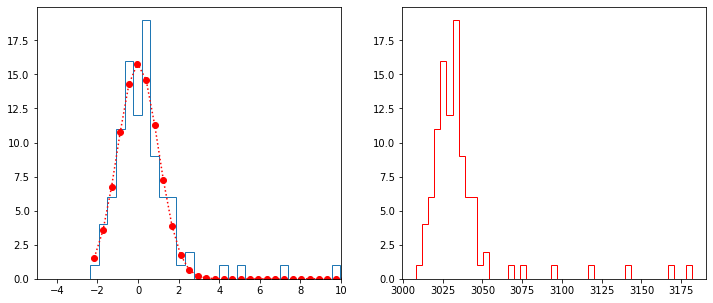

In [176]:
reshaped_CP3d=(chosenPixels3d-reshaped_means)/reshaped_stds
fig,ax=plt.subplots(1,2,figsize=(12,5))
histValues=ax[0].hist(reshaped_CP3d[:,100,97],histtype='step',bins=45)
ax[0].set_xlim(-5,10)
mphist=midpoints(histValues[1])
ax[1].hist(chosenPixels3d[:,100,97],color='r',histtype='step',bins=45)
popt,pcov=curve_fit(gaus,mphist,histValues[0],p0=[10,0,1])
ax[0].plot(mphist,gaus(mphist,*popt),'ro:',label='fit')
print(popt)


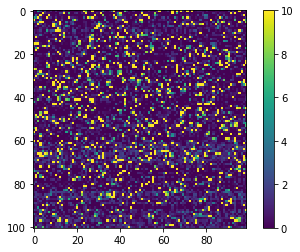

In [163]:
plt.imshow(reshaped_CP3d[1,:,:],vmin=0,vmax=10)
plt.colorbar()

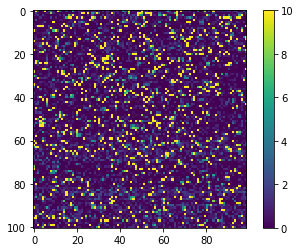

In [164]:
plt.imshow(reshaped_CP3d[2,:,:],vmin=0,vmax=10)
plt.colorbar()

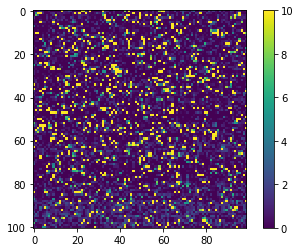

In [165]:
plt.imshow(reshaped_CP3d[3,:,:],vmin=0,vmax=10)
plt.colorbar()

[[False False  True ... False False False]
 [False False  True ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


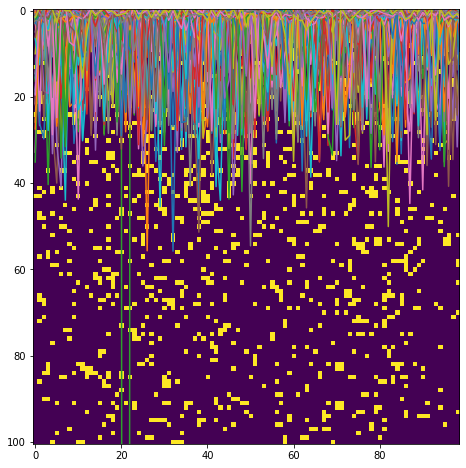

In [76]:
#ART
plt.subplots(1,1,figsize=(10,8))
sig4arr=(reshaped_CP3d[0,:,:]>4)
plt.plot(reshaped_CP3d[0,:,:])
print(sig4arr)
sig4arr=sig4arr.reshape(endy-starty,endx-startx)
plt.imshow(sig4arr)

0.5964596459645964


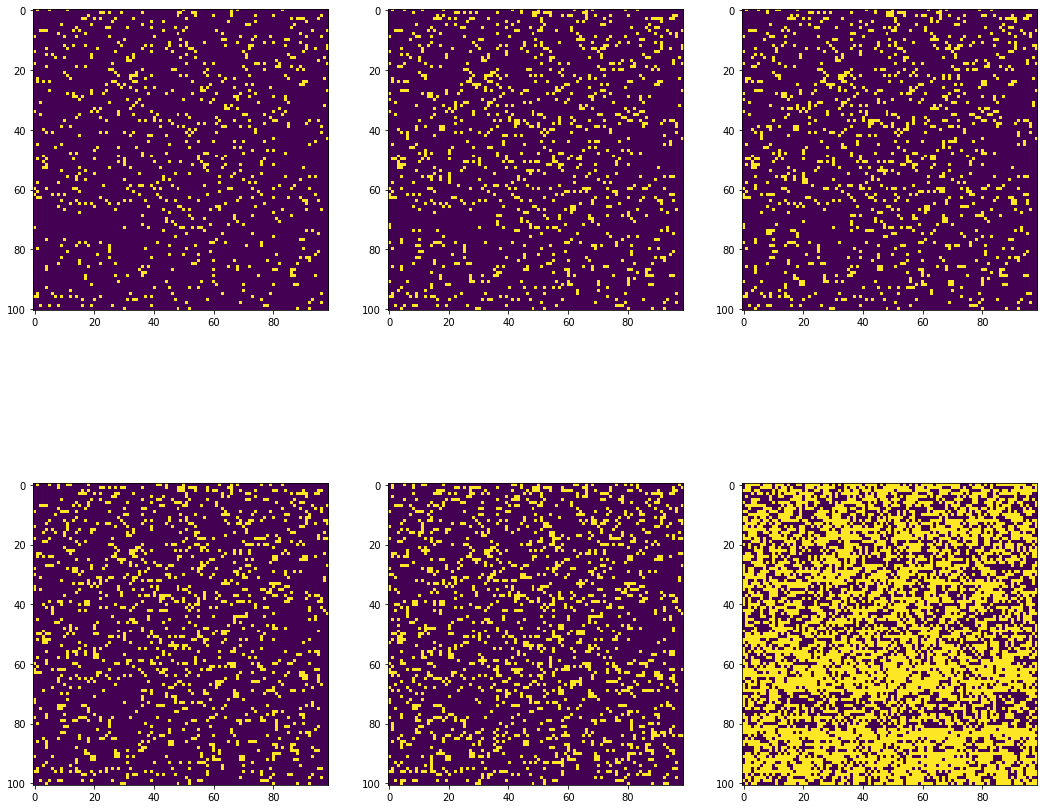

In [186]:
fig3,ax3=plt.subplots(2,3,figsize=(18,16))
sig10arr=(reshaped_CP3d[2,:,:]>10)
sig10arr=sig10arr.reshape(endy-starty,endx-startx)
sig5arr=(reshaped_CP3d[2,:,:]>5)
sig5arr=sig5arr.reshape(endy-starty,endx-startx)
sig4arr=(reshaped_CP3d[2,:,:]>4)
sig4arr=sig4arr.reshape(endy-starty,endx-startx)
sig3arr=(reshaped_CP3d[2,:,:]>3)
sig3arr=sig3arr.reshape(endy-starty,endx-startx)
sig2arr=(reshaped_CP3d[2,:,:]>2)
sig2arr=sig2arr.reshape(endy-starty,endx-startx)
sig1arr=(reshaped_CP3d[2,:,:]>0)
sig1arr=sig1arr.reshape(endy-starty,endx-startx)
ax3[0,0].imshow(sig10arr)
ax3[0,1].imshow(sig5arr)
ax3[0,2].imshow(sig4arr)
ax3[1,0].imshow(sig3arr)
ax3[1,1].imshow(sig2arr)
ax3[1,2].imshow(sig1arr)
print(((reshaped_CP3d[2,:,:]>0)*1.0).sum()/9999.0)

[ 2.57547499e+01 -2.56099744e-06  1.00002494e+00]


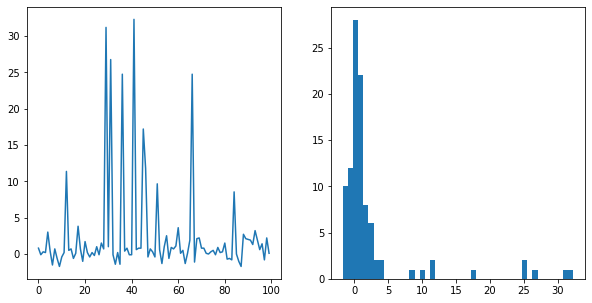

In [108]:
fig4,ax4=plt.subplots(1,2,figsize=(10,5))
ax4[0].plot(reshaped_CP3d[:,10,10])
histValues=ax4[1].hist(reshaped_CP3d[:,10,10],bins=45)
popt,pcov=curve_fit(gaus,histValues[1][:-1],histValues[0],p0=[10,0,1])
ax[1].plot(histValues[1][:-1],gaus(histValues[1][:-1],*popt),'ro:',label='fit')
print(popt)


In [188]:
all_CP_data

array([ 0.28501479,  0.84640557, -1.32898371, ...,  1.78170175,
        1.03053968, -1.12905128])

[2171.99346593   21.44631251    6.97827951]


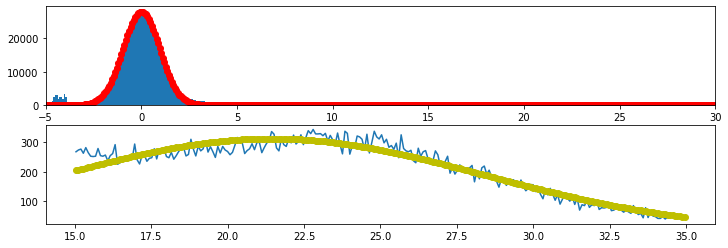

In [256]:
fig,ax=plt.subplots(2,1,figsize=(12,4))

all_hist=ax[0].hist(all_CP_data,bins=500,range=(-5,35))
# ax.set_ylim(0,320000)
ax[0].set_xlim(-5,30)
mphist=midpoints(all_hist[1])
popt,pcov=curve_fit(gaus,mphist,all_hist[0],p0=[100000,0,1])
_=ax[0].plot(mphist,gaus(mphist,*popt),'ro:',label='fit')

popt2,pcov2=curve_fit(gaus,mphist[250:],all_hist[0][250:],p0=[60,25,1])
print(popt2) 

ax[1].plot(mphist[250:],all_hist[0][250:])
_=ax[1].plot(mphist[250:],gaus(mphist[250:],*popt2),'yo:',label='fit')


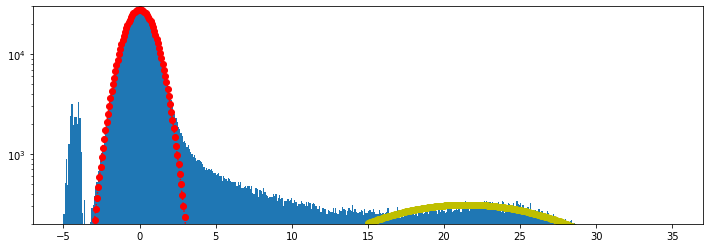

In [263]:
fig,ax=plt.subplots(1,1,figsize=(12,4))
ax.set_yscale('log')
ax.set_ylim([200.0,30000])

all_hist=ax.hist(all_CP_data,bins=500,range=(-5,35))
mphist=midpoints(all_hist[1])
_=ax.plot(mphist,gaus(mphist,*popt),'ro:',label='fit')
_=ax.plot(mphist[250:],gaus(mphist[250:],*popt2),'yo:',label='fit')

In [ ]:
all_CP_data[all_CP_data>4].shape

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,4))
ax.set_yscale('log')
ax.set_ylim([0.1,10000])

all_hist=ax.hist(all_CP_data,bins=150)
# _=ax.plot(all_hist[1][:-1],gaus(all_hist[1][:-1],*popt),'ro:',label='fit')

In [ ]:
all_CP_data=np.array([])
bad_fits_counter=0
for pix in range((endy-starty)*(endx-startx)):
# if pix%200==0:
    print(pix)
#     plt.plot(chosenPixels[:,pix])
#     plt.show()
#     plt.pause(1)
    plt.clf()

    histValues=plt.hist(chosenPixels[:,pix],bins=45)
    meanh=chosenPixels[:,pix].mean()
    try:
        popt,pcov=curve_fit(gaus,histValues[1][:-1],histValues[0],p0=[15,meanh,15])
    except:
        bad_fits_counter+=1
        continue
    print(popt)
    plt.plot(histValues[1][:-1],gaus(histValues[1][:-1],*popt),'ro:',label='fit')
    plt.show()
#     plt.cla()
    reshaped_CP=(chosenPixels[:,pix]-popt[1])/popt[2]
    all_CP_data=np.append(all_CP_data,reshaped_CP)
print(bad_fits_counter)

In [ ]:
all_CP_data=np.array([])
bad_fits_counter=0

for pix in range(0,10): #(endy-starty)*(endx-startx)
    if pix%200==0:
        print(pix)
#     plt.plot(chosenPixels[:,pix])
#     plt.show()
#     plt.pause(1)
#     histValues=plt.hist(chosenPixels[:,pix],bins=45)
#     meanh=chosenPixels[:,pix].mean()
    try:
        popt,pcov=curve_fit(gaus,histValues[1][:-1],histValues[0],p0=[15,meanh,15])
    except:
        bad_fits_counter+=1

        continue
#     print(popt)
#     plt.plot(histValues[1][:-1],gaus(histValues[1][:-1],*popt),'ro:',label='fit')
#     plt.show()
    plt.cla()
    plt.clf()
    reshaped_CP=(chosenPixels[:,pix]-popt[1])/popt[2]
    all_CP_data=np.append(all_CP_data,reshaped_CP)

print(bad_fits_counter)


In [ ]:
all_CP_data=np.array([])
bad_fits_counter=0

for pix in range(0,10): #(endy-starty)*(endx-startx)
    if pix%200==0:
        print(pix)
#     plt.plot(chosenPixels[:,pix])
#     plt.show()
#     plt.pause(1)
#     histValues=plt.hist(chosenPixels[:,pix],bins=45)
#     meanh=chosenPixels[:,pix].mean()
    histValues=plt.hist(chosenPixels[:,pix],bins=45)
    mu,sig=norm.fit((chosenPixels[:,pix]))
    print(mu,sig)
    plt.plot(histValues[1][:-1],gaus(histValues[1][:-1],15, mu, sig),'ro:',label='fit')
    plt.show()
    plt.clf()


In [ ]:
all_CP_data=np.array([])
bad_fits_counter=0
for pix in range(348,351): #(endy-starty)*(endx-startx)
# if pix%200==0:
    print(pix)
#     plt.plot(chosenPixels[:,pix])
#     plt.show()
#     plt.pause(1)
    plt.clf()

    print(chosenPixels[:,pix].min()-1)
    print(chosenPixels[:,pix].max()+1)
    bins = np.linspace(chosenPixels[:,pix].min()-1,chosenPixels[:,pix].min()+45,45 )
    digitized = np.digitize(chosenPixels[:,pix], bins)
    print(bins)
    print(digitized)
    print(len(bin_means))
#     histValues=plt.hist(chosenPixels[:,pix],bins=45)
    
#     meanh=chosenPixels[:,pix].mean()
#     try:
#         popt,pcov=curve_fit(gaus,histValues[1][:-1],histValues[0],p0=[15,meanh,15])
#     except:
#         bad_fits_counter+=1
#         continue
#     print(popt)
#     plt.plot(histValues[1][:-1],gaus(histValues[1][:-1],*popt),'ro:',label='fit')
#     plt.show()
# #     plt.cla()
#     reshaped_CP=(chosenPixels[:,pix]-popt[1])/popt[2]
#     all_CP_data=np.append(all_CP_data,reshaped_CP)
# print(bad_fits_counter)


In [ ]:
np.linspace(chosenPixels[:,pix].min()-1,chosenPixels[:,pix].max()-1,45).shape

In [115]:
arrr=np.array([1,2,3,4,5,6])
numidpoints(arrr)

array([1.5, 2.5, 3.5, 4.5, 5.5])

In [ ]:
number of hits/size of clusters vs radiation damage 
